In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

In [62]:
df = pd.read_csv('titanic.csv')

In [63]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

y_train = X_train['survived']
X_train = X_train.drop(columns=['id', 'survived'], inplace=False)

In [64]:
cat_attribs = ['pclass', 'age', 'sex']

cat_pipeline = Pipeline([
    ('Encoder', OneHotEncoder())
])

preprocessing_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat_attribs)
], remainder='passthrough', verbose_feature_names_out=False)

In [65]:
prepared = preprocessing_pipeline.fit_transform(X_train)

In [66]:
clf = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=42)
clf.fit(prepared, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

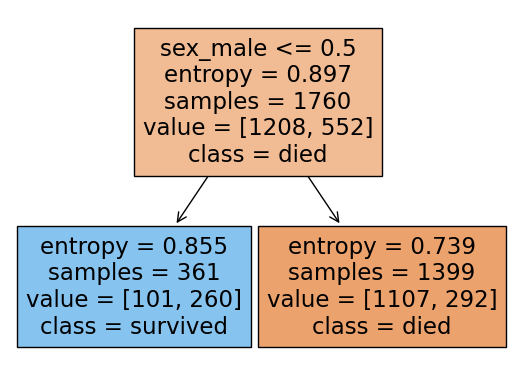

In [67]:
plot_tree(clf, feature_names=preprocessing_pipeline.get_feature_names_out(), class_names=['died', 'survived'], filled=True)
plt.show()